In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from statsmodels.formula.api import ols
%matplotlib inline

In [4]:
## Import training and validation sets

df = pd.read_csv('Bulldozer-dataset3.csv', low_memory=False,parse_dates= ['saledate'])
df

,SalesID,SalePrice,MachineID,ModelID,YearMade,UsageBand,Quantity Sold,saledate,fiProductClassDesc,state,ProductGroupDesc,Hydraulics,Blade_Type,Blade_type_cost,Differential_Type,Differential_type_cost,Steering_Controls,Steering_control_cost,Cost Price
0,1139246.0,66000.0,999089.0,3157.0,2004.0,Low,37.0,2006-11-16,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,Wheel Loader,2 Valve,None or Unspecified,1000.0,Standard,1500.0,Conventional,1500.0,16000.0
1,1139248.0,57000.0,117657.0,77.0,1996.0,Low,100.0,2004-03-26,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,Wheel Loader,2 Valve,None or Unspecified,1000.0,Standard,1500.0,Conventional,1500.0,16000.0
2,1139249.0,10000.0,434808.0,7009.0,2001.0,High,100.0,2004-02-26,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,Skid Steer Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
3,1139251.0,38500.0,1026470.0,332.0,2001.0,High,90.0,2011-05-19,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,Track Excavators,2 Valve,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
4,1139253.0,11000.0,1057373.0,17311.0,2007.0,Medium,50.0,2009-07-23,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,Skid Steer Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,1148364.0,10000.0,883470.0,3537.0,1000.0,Low,40.0,2009-06-18,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Mississippi,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2725,1148366.0,25000.0,1051617.0,20082.0,1998.0,Medium,78.0,2006-05-04,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",Ohio,Track Excavators,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2726,1148368.0,30500.0,1047546.0,4605.0,2004.0,Medium,300.0,2008-08-07,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Washington,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2727,1148369.0,26000.0,1057226.0,3538.0,1997.0,High,90.0,2007-03-23,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Oklahoma,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0


In [5]:
df.rename(columns={"Quantity Sold": "Quantity_sold"})

,SalesID,SalePrice,MachineID,ModelID,YearMade,UsageBand,Quantity_sold,saledate,fiProductClassDesc,state,ProductGroupDesc,Hydraulics,Blade_Type,Blade_type_cost,Differential_Type,Differential_type_cost,Steering_Controls,Steering_control_cost,Cost Price
0,1139246.0,66000.0,999089.0,3157.0,2004.0,Low,37.0,2006-11-16,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,Wheel Loader,2 Valve,None or Unspecified,1000.0,Standard,1500.0,Conventional,1500.0,16000.0
1,1139248.0,57000.0,117657.0,77.0,1996.0,Low,100.0,2004-03-26,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,Wheel Loader,2 Valve,None or Unspecified,1000.0,Standard,1500.0,Conventional,1500.0,16000.0
2,1139249.0,10000.0,434808.0,7009.0,2001.0,High,100.0,2004-02-26,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,Skid Steer Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
3,1139251.0,38500.0,1026470.0,332.0,2001.0,High,90.0,2011-05-19,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,Track Excavators,2 Valve,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
4,1139253.0,11000.0,1057373.0,17311.0,2007.0,Medium,50.0,2009-07-23,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,Skid Steer Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,1148364.0,10000.0,883470.0,3537.0,1000.0,Low,40.0,2009-06-18,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Mississippi,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2725,1148366.0,25000.0,1051617.0,20082.0,1998.0,Medium,78.0,2006-05-04,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",Ohio,Track Excavators,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2726,1148368.0,30500.0,1047546.0,4605.0,2004.0,Medium,300.0,2008-08-07,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Washington,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0
2727,1148369.0,26000.0,1057226.0,3538.0,1997.0,High,90.0,2007-03-23,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Oklahoma,Backhoe Loaders,Auxiliary,None or Unspecified,1000.0,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0


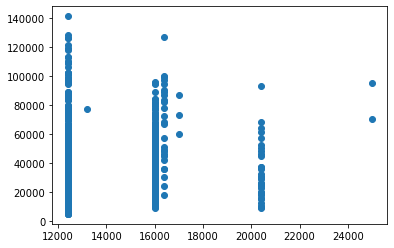

In [6]:

fig, ax = plt.subplots()
ax.scatter(df['Cost Price'][:1000], df['SalePrice'][:1000])


In [7]:
## Sort DataFrame in date order

df.sort_values(by = ['saledate'],inplace = True, ascending =True)

In [8]:
## make a copy using copy()
df_temp = df.copy()
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayofweek'] = df_temp.saledate.dt.dayofweek
df_temp['saledayofyear'] = df_temp.saledate.dt.dayofyear

df_temp.head().T





,243,2302,701,1367,1667
SalesID,1.14005e+06,1.14694e+06,1.14152e+06,1.14384e+06,1.14479e+06
SalePrice,33000,25000,11500,44000,18500
MachineID,1.05559e+06,829758,157544,472863,444008
ModelID,1956,7046,7009,77,7014
YearMade,1995,2001,1999,1993,2003
UsageBand,Medium,Low,Medium,Medium,Low
Quantity Sold,20,130,120,100,97
saledate,2004-01-20 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00
fiProductClassDesc,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...","Hydraulic Excavator, Track - 4.0 to 5.0 Metric...",Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Wheel Loader - 150.0 to 175.0 Horsepower,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
state,Pennsylvania,Massachusetts,Georgia,Texas,New York


In [9]:
df_temp = df_temp.rename(columns={"Quantity Sold": "Quantity_sold"})
df_temp

,SalesID,SalePrice,MachineID,ModelID,YearMade,UsageBand,Quantity_sold,saledate,fiProductClassDesc,state,...,Differential_Type,Differential_type_cost,Steering_Controls,Steering_control_cost,Cost Price,saleYear,saleMonth,saleDay,saleDayofweek,saledayofyear
243,1140049.0,33000.0,1055591.0,1956.0,1995.0,Medium,20.0,2004-01-20,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Pennsylvania,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,1.0,20.0,1.0,20.0
2302,1146945.0,25000.0,829758.0,7046.0,2001.0,Low,130.0,2004-01-29,"Hydraulic Excavator, Track - 4.0 to 5.0 Metric...",Massachusetts,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,1.0,29.0,3.0,29.0
701,1141518.0,11500.0,157544.0,7009.0,1999.0,Medium,120.0,2004-01-29,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Georgia,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,1.0,29.0,3.0,29.0
1367,1143835.0,44000.0,472863.0,77.0,1993.0,Medium,100.0,2004-01-29,Wheel Loader - 150.0 to 175.0 Horsepower,Texas,...,Limited Slip,2000.0,Conventional,1500.0,17000.0,2004.0,1.0,29.0,3.0,29.0
1667,1144789.0,18500.0,444008.0,7014.0,2003.0,Low,97.0,2004-01-29,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,1.0,29.0,3.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,1141468.0,11500.0,1010461.0,36033.0,2005.0,Medium,20.0,2011-08-26,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,North Carolina,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2011.0,8.0,26.0,4.0,238.0
1379,1143888.0,80000.0,1028801.0,18174.0,2006.0,High,200.0,2011-08-26,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Alabama,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2011.0,8.0,26.0,4.0,238.0
2576,1147862.0,27000.0,904472.0,3542.0,2002.0,High,20.0,2011-08-26,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Kentucky,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2011.0,8.0,26.0,4.0,238.0
1108,1142970.0,74000.0,1033699.0,16506.0,2007.0,High,78.0,2011-08-29,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",West Virginia,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2011.0,8.0,29.0,0.0,241.0


In [10]:
## Save data to another csv file

df_temp.to_csv('Bulldozer-final-dataset.csv', index=False)

In [11]:
## Now we enriched our DataFrame with date time features, let's drop saledate column

df_temp.drop('saledate', inplace= True, axis=1)

In [12]:
df_temp.sort_values(by = ['saleYear'],inplace = True, ascending =True)


df_temp


In [13]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,UsageBand,Quantity_sold,fiProductClassDesc,state,ProductGroupDesc,...,Differential_Type,Differential_type_cost,Steering_Controls,Steering_control_cost,Cost Price,saleYear,saleMonth,saleDay,saleDayofweek,saledayofyear
243,1140049.0,33000.0,1055591.0,1956.0,1995.0,Medium,20.0,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Pennsylvania,Track Excavators,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,1.0,20.0,1.0,20.0
1233,1143412.0,38000.0,855207.0,13776.0,2001.0,Medium,40.0,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",New York,Track Type Tractors,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,5.0,20.0,3.0,141.0
210,1139924.0,20500.0,773581.0,7040.0,2000.0,Medium,90.0,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,Track Excavators,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,5.0,20.0,3.0,141.0
2635,1148056.0,75000.0,274458.0,23931.0,1995.0,Medium,100.0,Motorgrader - 170.0 to 200.0 Horsepower,North Dakota,Motor Graders,...,None or Unspecified,1200.0,None or Unspecified,1000.0,12400.0,2004.0,5.0,20.0,3.0,141.0
1021,1142655.0,52000.0,269284.0,1623.0,1999.0,Medium,80.0,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",South Carolina,Track Type Tractors,...,None or Unspecified,1200.0,None or Unspecified,1000.0,16400.0,2004.0,5.0,20.0,3.0,141.0


/Users/avromukherjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


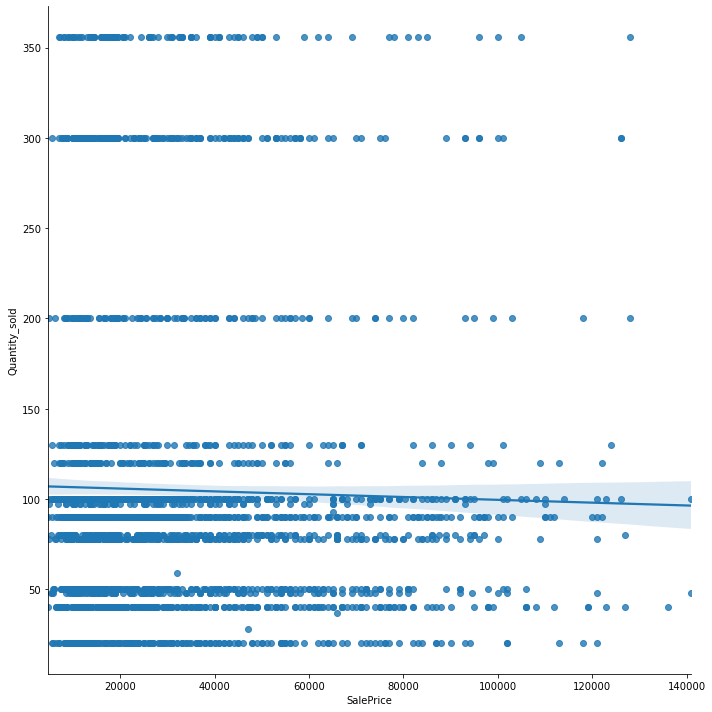

In [14]:
## Linear relation of price and sales price
sns.lmplot(x = "SalePrice", y = "Quantity_sold", 
data = df_temp,fit_reg = True, size = 10)


In [15]:
# fit OLS model
model = ols("Quantity_sold ~ SalePrice", data = df_temp).fit()
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Quantity_sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.484
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.223
Time:                        05:50:49   Log-Likelihood:                -15887.
No. Observations:                2728   AIC:                         3.178e+04
Df Residuals:                    2726   BIC:                         3.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.3401      2.643     40.614      0.0

In [45]:
## Finding the profit maximizing price
##The coefficient we are looking for is coming from the regression model above — the intercept and the price coefficient — to measure the corresponding sales quantity. We can now plug these values into equation 

# a range of diffferent prices to find the optimum one
Price = [66000,57000,38500,26500,21000,27000,21500,65000,24000,22500,36000,30500,28000,19000]

#Using cost 12400
cost = 12400
Revenue = []
for i in Price:
   quantity_demanded = 107.34 - 0.000078* i
   
   # profit function
   Revenue.append(((i-cost) * quantity_demanded)/1000)
# create data frame of price and revenue
profit1 = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price

#Revenue
profit1
#Price

,Price,Revenue
0,66000,5477.4912
1,57000,4589.0724
2,38500,2723.1957
3,26500,1484.3493
4,21000,909.0372
5,27000,1536.4164
6,21500,961.5333
7,65000,5379.4020
8,24000,1223.4288
9,22500,1066.4085


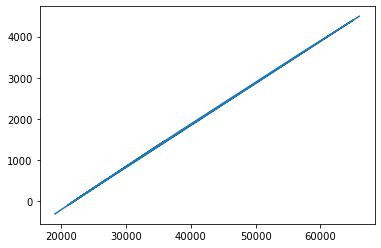

In [46]:
plt.plot(profit["Price"], profit["Revenue"])

## The graph shows that at maximum sales price, we can generate the maximum profit given our cost price is 12400. 


In [47]:
## Finding the profit maximizing price
##The coefficient we are looking for is coming from the regression model above — the intercept and the price coefficient — to measure the corresponding sales quantity. We can now plug these values into equation 

# a range of diffferent prices to find the optimum one
Price = [66000,57000,38500,26500,21000,27000,21500,65000,24000,22500,36000,30500,28000,19000]

#Using cost 16000
cost = 16000
Revenue = []
for i in Price:
   quantity_demanded = 107.34 - 0.000078* i
   
   # profit function
   Revenue.append(((i-cost) * quantity_demanded)/1000)
# create data frame of price and revenue
profit2 = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price

#Revenue
profit2
#Price

,Price,Revenue
0,66000,5109.6000
1,57000,4218.6540
2,38500,2347.5825
3,26500,1105.3665
4,21000,528.5100
5,27000,1157.5740
6,21500,581.1465
7,65000,5011.2300
8,24000,843.7440
9,22500,686.3025


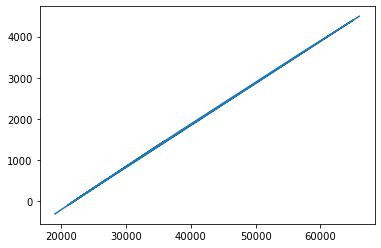

In [48]:
plt.plot(profit["Price"], profit["Revenue"])

##The graph shows that at maximum sales price, we can generate the maximum profit given our cost price is 16000. Let's try another cost price provided in the sheet. i.e. 22000

In [49]:
## Finding the profit maximizing price
##The coefficient we are looking for is coming from the regression model above — the intercept and the price coefficient — to measure the corresponding sales quantity. We can now plug these values into equation 

# a range of diffferent prices to find the optimum one
Price = [66000,57000,38500,26500,21000,27000,21500,65000,24000,22500,36000,30500,28000,19000]

#Using cost 22000
cost = 22000
Revenue = []
for i in Price:
   quantity_demanded = 107.34 - 0.000078* i
   
   # profit function
   Revenue.append(((i-cost) * quantity_demanded)/1000)
# create data frame of price and revenue
profit3 = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price

#Revenue
profit3
#Price

,Price,Revenue
0,66000,4496.4480
1,57000,3601.2900
2,38500,1721.5605
3,26500,473.7285
4,21000,-105.7020
5,27000,526.1700
6,21500,-52.8315
7,65000,4397.6100
8,24000,210.9360
9,22500,52.7925


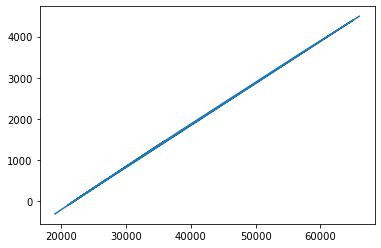

In [50]:
plt.plot(profit["Price"], profit["Revenue"])

## As you can see that, the revenue fell after the cost price was changed to 22000. This means we have crossed the minimum cost point which can maximize the profit.

In [62]:
## Finding the maximum profit from the three models
profit1["Revenue"].max(),profit2["Revenue"].max(), profit3["Revenue"].max()



(5477.4912, 5109.6, 4496.448)

## Hence 12400 is the minimum cost price under the below constraints

## 1000<=x<=3000
## 1200<=y<=2000
## 1000<=z<=3000